<a href="https://colab.research.google.com/github/NishthaJethani/traffic-sign-detection-recognition/blob/main/traffic_sign_detection_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

extracted_files=os.listdir("/content/drive/MyDrive/traffic_sign_classification_dataset-drive-folder/traffic_sign_classification_dataset")
print(extracted_files)

['test', 'train', 'Copy of traffic-sign-detection-recognition.ipynb']


In [3]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_data_dir = '/content/drive/MyDrive/traffic_sign_classification_dataset-drive-folder/traffic_sign_classification_dataset/train'
test_data_dir='/content/drive/MyDrive/traffic_sign_classification_dataset-drive-folder/traffic_sign_classification_dataset/test'

train=image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=[64, 64],
    interpolation='nearest',
    validation_split=0.2,
    batch_size=32,
    shuffle=True,
    seed=21,
    subset="training",
)

validate=image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=[64, 64],
    interpolation='nearest',
    validation_split=0.2,
    batch_size=32,
    shuffle=False,
    seed=21,
    subset="validation",
)

test=image_dataset_from_directory(
    test_data_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=[64, 64],
    interpolation='nearest',
    batch_size=32,
)

Found 4448 files belonging to 85 classes.
Using 3559 files for training.
Found 4448 files belonging to 85 classes.
Using 889 files for validation.
Found 1288 files belonging to 85 classes.


In [4]:
signs=[]

all_signs=os.listdir(train_data_dir)

for item in all_signs:
  signs.append(item)

signs=sorted(signs)
signs

['ALL_MOTOR_VEHICLE_PROHIBITED',
 'AXLE_LOAD_LIMIT',
 'BARRIER_AHEAD',
 'BULLOCK_AND_HANDCART_PROHIBITED',
 'BULLOCK_PROHIBITED',
 'CATTLE',
 'COMPULSARY_AHEAD',
 'COMPULSARY_AHEAD_OR_TURN_LEFT',
 'COMPULSARY_AHEAD_OR_TURN_RIGHT',
 'COMPULSARY_CYCLE_TRACK',
 'COMPULSARY_KEEP_LEFT',
 'COMPULSARY_KEEP_RIGHT',
 'COMPULSARY_MINIMUM_SPEED',
 'COMPULSARY_SOUND_HORN',
 'COMPULSARY_TURN_LEFT',
 'COMPULSARY_TURN_LEFT_AHEAD',
 'COMPULSARY_TURN_RIGHT',
 'COMPULSARY_TURN_RIGHT_AHEAD',
 'CROSS_ROAD',
 'CYCLE_CROSSING',
 'CYCLE_PROHIBITED',
 'DANGEROUS_DIP',
 'DIRECTION',
 'FALLING_ROCKS',
 'FERRY',
 'GAP_IN_MEDIAN',
 'GIVE_WAY',
 'GUARDED_LEVEL_CROSSING',
 'HANDCART_PROHIBITED',
 'HEIGHT_LIMIT',
 'HORN_PROHIBITED',
 'HUMP_OR_ROUGH_ROAD',
 'LEFT_HAIR_PIN_BEND',
 'LEFT_HAND_CURVE',
 'LEFT_REVERSE_BEND',
 'LEFT_TURN_PROHIBITED',
 'LENGTH_LIMIT',
 'LOAD_LIMIT',
 'LOOSE_GRAVEL',
 'MEN_AT_WORK',
 'NARROW_BRIDGE',
 'NARROW_ROAD_AHEAD',
 'NO_ENTRY',
 'NO_PARKING',
 'NO_STOPPING_OR_STANDING',
 'OVERTAKING_P

In [5]:
from tensorflow.keras import models, layers
from tensorflow.keras.regularizers import l2


model=models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(5,5), kernel_regularizer=l2(0.01), activation='relu', input_shape=(64, 64, 3)),
    layers.Conv2D(filters=32, kernel_size=(5,5), kernel_regularizer=l2(0.01), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(axis=-1),

    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(axis=-1),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(axis=-1),

    layers.Dropout(rate=0.25),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.25),

    layers.Dense(85, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 16)        1216      
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 32)        12832     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        4624      
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        4

In [7]:
from tensorflow import keras

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
from tensorflow.keras import callbacks


early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

Epoch 1/30
112/112 [==============================] - 375s 3s/step - loss: 2.9908 - accuracy: 0.3883 - val_loss: 2.8318 - val_accuracy: 0.4376
Epoch 2/30
112/112 [==============================] - 109s 923ms/step - loss: 1.5530 - accuracy: 0.6704 - val_loss: 0.9859 - val_accuracy: 0.8245
Epoch 3/30
112/112 [==============================] - 113s 978ms/step - loss: 1.0117 - accuracy: 0.7831 - val_loss: 0.6606 - val_accuracy: 0.8628
Epoch 4/30
112/112 [==============================] - 109s 939ms/step - loss: 0.7710 - accuracy: 0.8368 - val_loss: 0.4084 - val_accuracy: 0.9528
Epoch 5/30
112/112 [==============================] - 111s 940ms/step - loss: 0.5741 - accuracy: 0.8887 - val_loss: 0.4260 - val_accuracy: 0.9483
Epoch 6/30
112/112 [==============================] - 111s 951ms/step - loss: 0.4314 - accuracy: 0.9284 - val_loss: 0.3178 - val_accuracy: 0.9741
Epoch 7/30
112/112 [==============================] - 110s 944ms/step - loss: 0.3224 - accuracy: 0.9595 - val_loss: 0.2528 - va

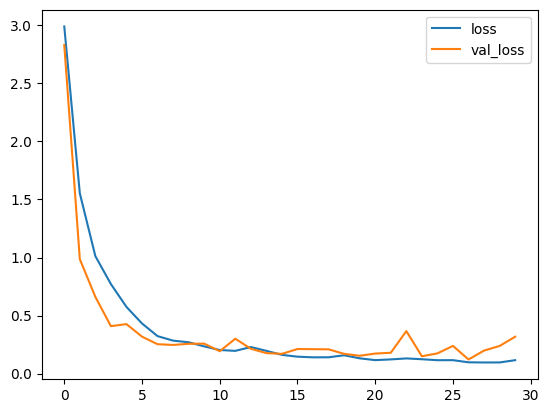

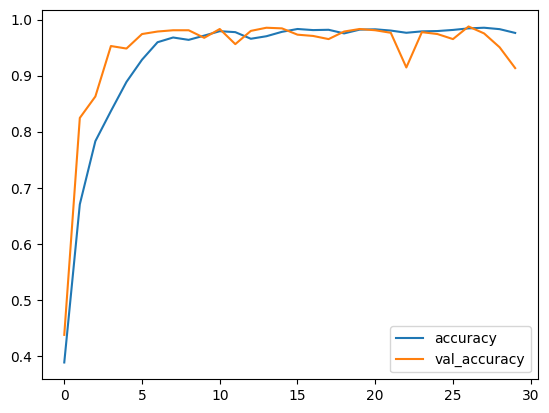

In [9]:
history=model.fit(train, epochs=30, validation_data=validate, callbacks=[early_stopping])

import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [10]:
test_loss, test_accuracy = model.evaluate(test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

41/41 [==============================] - 140s 3s/step - loss: 1.2657 - accuracy: 0.8137
Test Loss: 1.2657089233398438
Test Accuracy: 0.8136646151542664


In [11]:
import tensorflow as tf

model2 = tf.keras.models.load_model('/content/drive/MyDrive/Deep_Learning/model_85_17.h5')

test_loss, test_accuracy = model2.evaluate(test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


41/41 [==============================] - 15s 325ms/step - loss: 0.8948 - accuracy: 0.8517
Test Loss: 0.8947815299034119
Test Accuracy: 0.8517080545425415


1/1 [==============================] - 0s 328ms/step


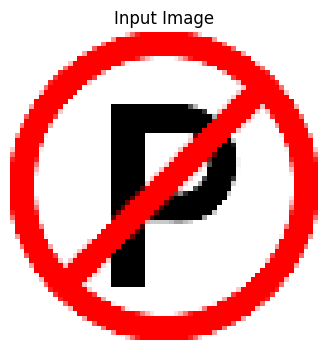

In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


new_image_path = '/content/drive/MyDrive/Deep_Learning/images (1).png'
img = image.load_img(new_image_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = model2.predict(img_array)


img_array = np.reshape(img_array, (1, 64, 64, 3))
img_array = img_array/255.0
plt.figure(figsize=(8, 4))
plt.imshow(img_array[0])
plt.title("Input Image")
plt.axis('off')

plt.show()

In [13]:
predicted_class_index = np.argmax(predictions)
print(predicted_class_index, signs[predicted_class_index])

43 NO_PARKING


1/1 [==============================] - 0s 35ms/step


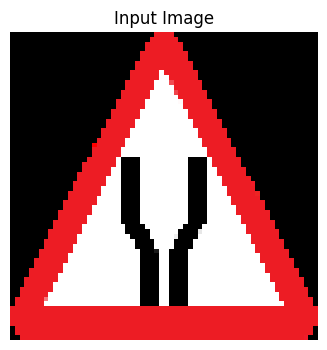

56 ROAD_WIDENS_AHEAD


In [14]:

new_image_path = '/content/drive/MyDrive/Deep_Learning/Indian_Road_Sign_II-22.svg.png'
img = image.load_img(new_image_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = model2.predict(img_array)


img_array = np.reshape(img_array, (1, 64, 64, 3))
img_array = img_array/255.0
plt.figure(figsize=(8, 4))
plt.imshow(img_array[0])
plt.title("Input Image")
plt.axis('off')

plt.show()

predicted_class_index = np.argmax(predictions)
print(predicted_class_index, signs[predicted_class_index])

1/1 [==============================] - 0s 34ms/step


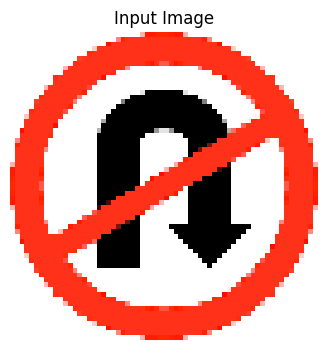

82 U_TURN_PROHIBITED


In [15]:
new_image_path = '/content/drive/MyDrive/Deep_Learning/images.png'
img = image.load_img(new_image_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = model2.predict(img_array)


img_array = np.reshape(img_array, (1, 64, 64, 3))
img_array = img_array/255.0
plt.figure(figsize=(8, 4))
plt.imshow(img_array[0])
plt.title("Input Image")
plt.axis('off')

plt.show()

predicted_class_index = np.argmax(predictions)
print(predicted_class_index, signs[predicted_class_index])

1/1 [==============================] - 0s 33ms/step


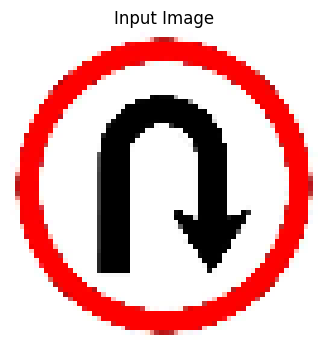

82 U_TURN_PROHIBITED


In [16]:
new_image_path = '/content/drive/MyDrive/Deep_Learning/164cb158a793db1037749d166bf5d483.jpg'
img = image.load_img(new_image_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = model2.predict(img_array)


img_array = np.reshape(img_array, (1, 64, 64, 3))
img_array = img_array/255.0
plt.figure(figsize=(8, 4))
plt.imshow(img_array[0])
plt.title("Input Image")
plt.axis('off')

plt.show()

predicted_class_index = np.argmax(predictions)
print(predicted_class_index, signs[predicted_class_index])

1/1 [==============================] - 0s 38ms/step


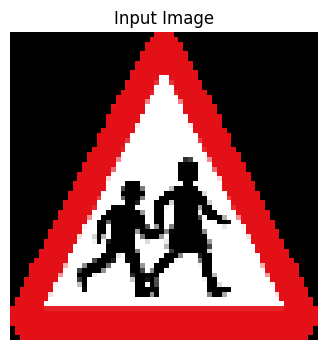

58 SCHOOL_AHEAD


In [17]:
new_image_path = '/content/drive/MyDrive/Deep_Learning/UK_traffic_sign_545.svg.png'
img = image.load_img(new_image_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = model2.predict(img_array)


img_array = np.reshape(img_array, (1, 64, 64, 3))
img_array = img_array/255.0
plt.figure(figsize=(8, 4))
plt.imshow(img_array[0])
plt.title("Input Image")
plt.axis('off')

plt.show()

predicted_class_index = np.argmax(predictions)
print(predicted_class_index, signs[predicted_class_index])

1/1 [==============================] - 0s 99ms/step


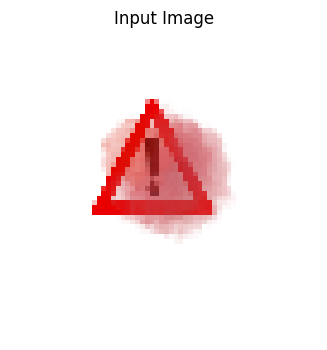

4 BULLOCK_PROHIBITED


In [18]:
new_image_path = '/content/drive/MyDrive/Deep_Learning/11.png'
img = image.load_img(new_image_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = model2.predict(img_array)


img_array = np.reshape(img_array, (1, 64, 64, 3))
img_array = img_array/255.0
plt.figure(figsize=(8, 4))
plt.imshow(img_array[0])
plt.title("Input Image")
plt.axis('off')

plt.show()

predicted_class_index = np.argmax(predictions)
print(predicted_class_index, signs[predicted_class_index])

1/1 [==============================] - 0s 52ms/step


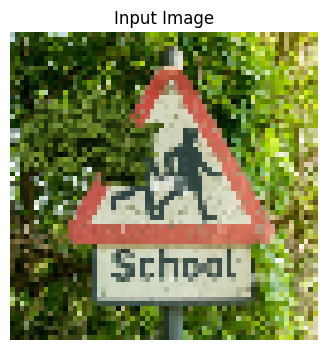

58 SCHOOL_AHEAD


In [19]:
new_image_path = '/content/drive/MyDrive/Deep_Learning/12.png'
img = image.load_img(new_image_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = model2.predict(img_array)


img_array = np.reshape(img_array, (1, 64, 64, 3))
img_array = img_array/255.0
plt.figure(figsize=(8, 4))
plt.imshow(img_array[0])
plt.title("Input Image")
plt.axis('off')

plt.show()

predicted_class_index = np.argmax(predictions)
print(predicted_class_index, signs[predicted_class_index])

1/1 [==============================] - 0s 99ms/step


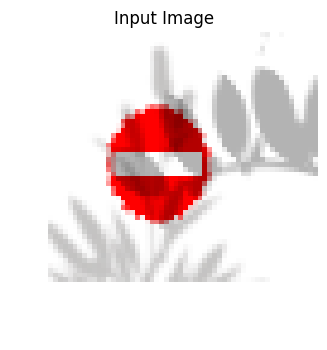

0 ALL_MOTOR_VEHICLE_PROHIBITED


In [20]:
new_image_path = '/content/drive/MyDrive/Deep_Learning/13.png'
img = image.load_img(new_image_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = model2.predict(img_array)


img_array = np.reshape(img_array, (1, 64, 64, 3))
img_array = img_array/255.0
plt.figure(figsize=(8, 4))
plt.imshow(img_array[0])
plt.title("Input Image")
plt.axis('off')

plt.show()

predicted_class_index = np.argmax(predictions)
print(predicted_class_index, signs[predicted_class_index])